In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: GO
Digite os 2 primeiros digitos do shapefile: 52


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 14 columns):
ID            9491 non-null int64
CD_GEOCODI    9491 non-null object
TIPO          9491 non-null object
CD_GEOCODB    77 non-null object
NM_BAIRRO     77 non-null object
CD_GEOCODS    9491 non-null object
NM_SUBDIST    1631 non-null object
CD_GEOCODD    9491 non-null object
NM_DISTRIT    9491 non-null object
CD_GEOCODM    9491 non-null object
NM_MUNICIP    9491 non-null object
NM_MICRO      9491 non-null object
NM_MESO       9491 non-null object
geometry      9491 non-null object
dtypes: int64(1), object(13)
memory usage: 1.0+ MB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(9434, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,520005005000001,124.0,409.0,"3,3","2,03","1485,31","4234430,88","1587,75","4364943,77","927,42","2755835,32","1258,39","3325042,03"
1,520005005000002,261.0,796.0,"3,05","1,89","717,21","903696,62","843,2","956451,76",551,"603807,51","775,35","675856,69"
2,520005005000003,464.0,1521.0,"3,28","1,8","1096,56","1457639,94","1194,38","1470867,07","637,88","839265,15","973,88","954257,57"
3,520005005000004,246.0,863.0,"3,51","2,05","1222,68","1538841,68","1285,38","1537154,18","667,09",849749,"984,76","941759,99"
4,520005005000005,91.0,251.0,"2,76","2,03","831,73","883290,65","1022,8","890883,42","529,98","589542,45","904,55","667983,64"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9434 entries, 0 to 9433
Data columns (total 26 columns):
ID            9434 non-null int64
CD_GEOCODI    9434 non-null int64
TIPO          9434 non-null object
CD_GEOCODB    76 non-null object
NM_BAIRRO     76 non-null object
CD_GEOCODS    9434 non-null object
NM_SUBDIST    1624 non-null object
CD_GEOCODD    9434 non-null object
NM_DISTRIT    9434 non-null object
CD_GEOCODM    9434 non-null object
NM_MUNICIP    9434 non-null object
NM_MICRO      9434 non-null object
NM_MESO       9434 non-null object
geometry      9434 non-null object
V001          9428 non-null float64
V002          9428 non-null float64
V003          9428 non-null object
V004          9428 non-null object
V005          9428 non-null object
V006          9428 non-null object
V007          9426 non-null object
V008          9426 non-null object
V009          9434 non-null object
V010          9434 non-null object
V011          9432 non-null object
V012          

In [11]:
del gdf
del dados

Text(0.5,1,'GO')

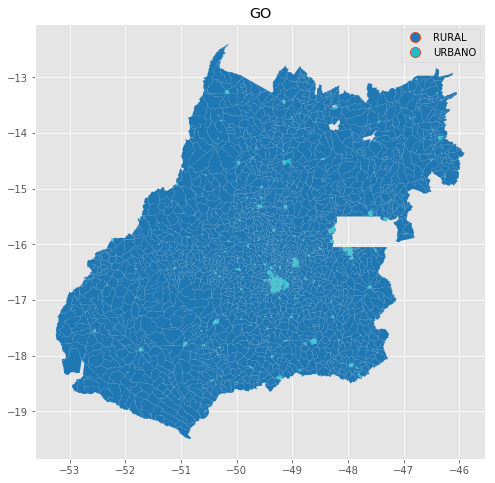

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
679,DavinÃ³polis,GO,0.667,5206909.0,POLYGON ((-47.56447657304715 -18.1586573696878...,0.666939
906,Diorama,GO,0.829,5207105.0,POLYGON ((-51.25555945440481 -16.2405354348405...,0.829385
927,PortelÃ¢ndia,GO,2.244,5218102.0,POLYGON ((-52.6858607887363 -17.35759229568386...,2.243919
1713,CromÃ­nia,GO,1.620,5206503.0,POLYGON ((-49.38763314541841 -17.2886520004275...,1.619897
3331,Cumari,GO,1.386,5206602.0,POLYGON ((-48.16063393927219 -18.2623489056934...,1.385485


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 246 entries, 679 to 4679
Data columns (total 6 columns):
Municipio     246 non-null object
UF            246 non-null object
Area_Urb      246 non-null float64
CD_GEOCODM    246 non-null int64
geometry      246 non-null object
Area          246 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.5+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no GO')

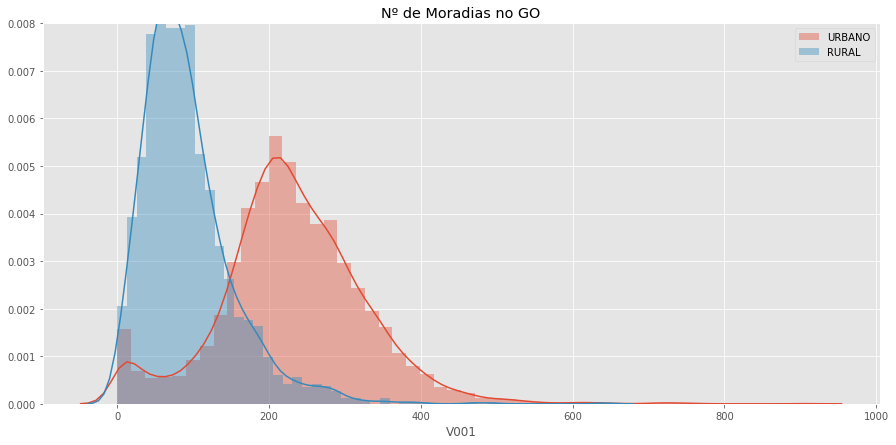

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    2046.000000
mean       92.009775
std        59.985914
min         0.000000
25%        52.000000
50%        80.500000
75%       118.000000
max       641.000000
Name: V001, dtype: float64
URBANO 
 count    7388.000000
mean      229.833785
std        95.477023
min         0.000000
25%       177.000000
50%       225.000000
75%       285.000000
max       906.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

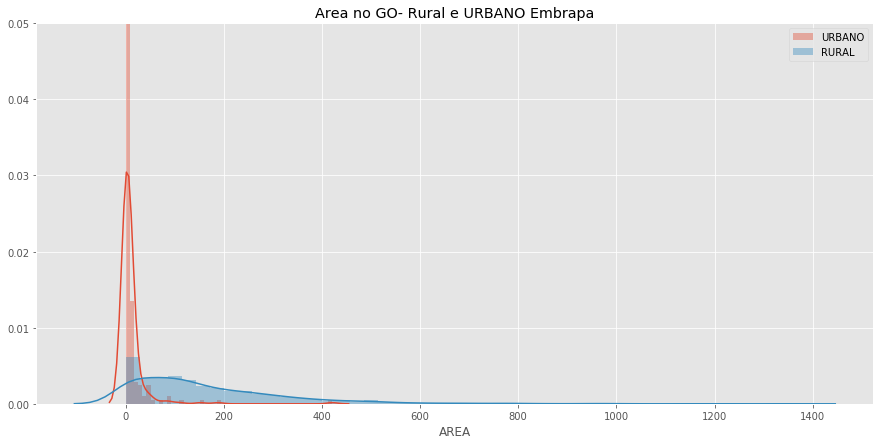

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

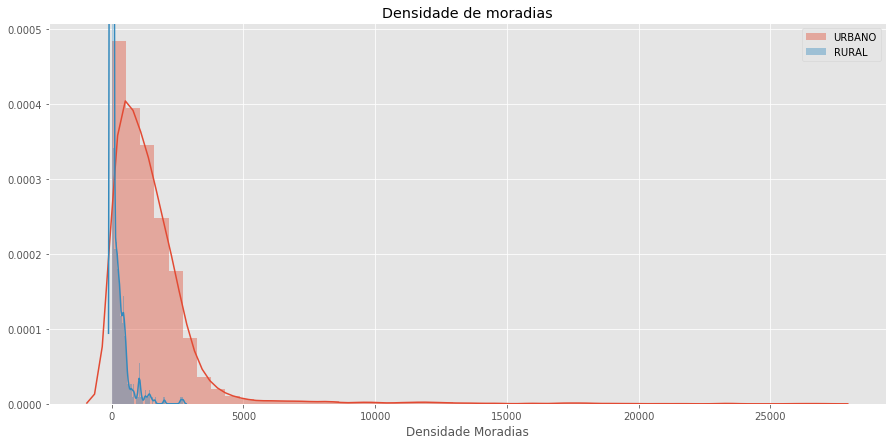

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    2046.000000
mean       42.867326
std       177.860937
min         0.000000
25%         0.322125
50%         0.661660
75%         1.594743
max      2715.414246
Name: Densidade Moradias, dtype: float64
URBANO 
 count     7388.000000
mean      1500.353177
std       1856.405049
min          0.000000
25%        512.296141
50%       1146.869154
75%       1959.629004
max      26996.959047
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000
mean,7935.280000,5.207652e+14,194.240000,665.240000,0.169118,1302.844681
std,2314.901501,5.103027e+11,91.845105,331.148793,0.090857,500.151226
min,4496.000000,5.200050e+14,31.000000,82.000000,0.011416,786.510751
25%,7083.000000,5.205497e+14,113.000000,367.000000,0.107777,1042.969823
50%,7136.000000,5.205513e+14,202.000000,668.000000,0.162928,1099.170809
75%,7477.000000,5.207808e+14,252.000000,887.000000,0.241847,1436.218779
max,12879.000000,5.219712e+14,400.000000,1339.000000,0.333447,2715.414246


## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    246.000000
mean      10.587495
std       33.307469
min        0.424596
25%        1.390539
50%        2.488234
75%        6.870988
max      421.522704
Name: Area, dtype: float64
RURAL 
 count    2046.000000
mean      163.281688
std       159.563918
min         0.011416
25%        51.663516
50%       120.768035
75%       233.902340
max      1341.830189
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

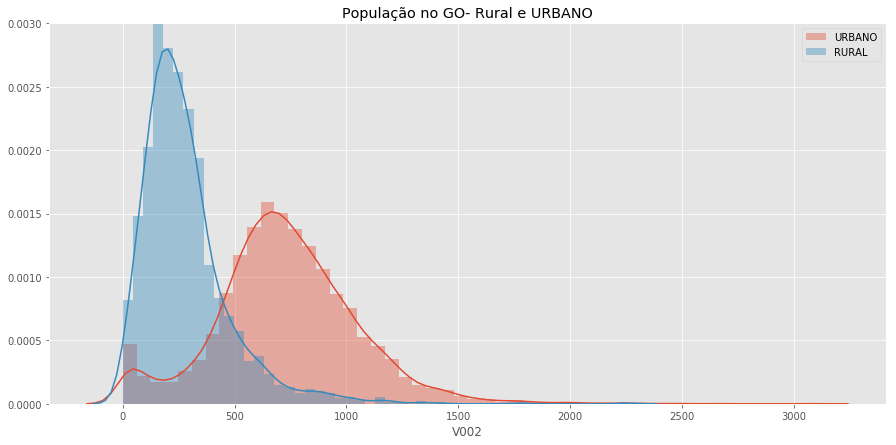

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    2046.000000
mean      280.642717
std       197.048932
min         0.000000
25%       155.000000
50%       239.500000
75%       350.000000
max      2259.000000
Name: V002, dtype: float64
URBANO 
 count    7388.000000
mean      730.291960
std       317.239767
min         0.000000
25%       546.000000
50%       713.000000
75%       910.000000
max      3083.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [32]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000
mean,7107.800000,5.205500e+14,280.600000,999.600000,0.198659,1422.479918
std,28.891175,7.155417e+08,68.769906,205.712907,0.053523,89.965514
min,7082.000000,5.205497e+14,234.000000,811.000000,0.155091,1284.538017
25%,7083.000000,5.205497e+14,237.000000,887.000000,0.162928,1401.563442
50%,7110.000000,5.205497e+14,257.000000,930.000000,0.175794,1436.218779
75%,7111.000000,5.205497e+14,275.000000,1031.000000,0.214085,1461.940476
max,7153.000000,5.205513e+14,400.000000,1339.000000,0.285396,1528.138877


Text(0.5,1,'SCRCU - Por Município')

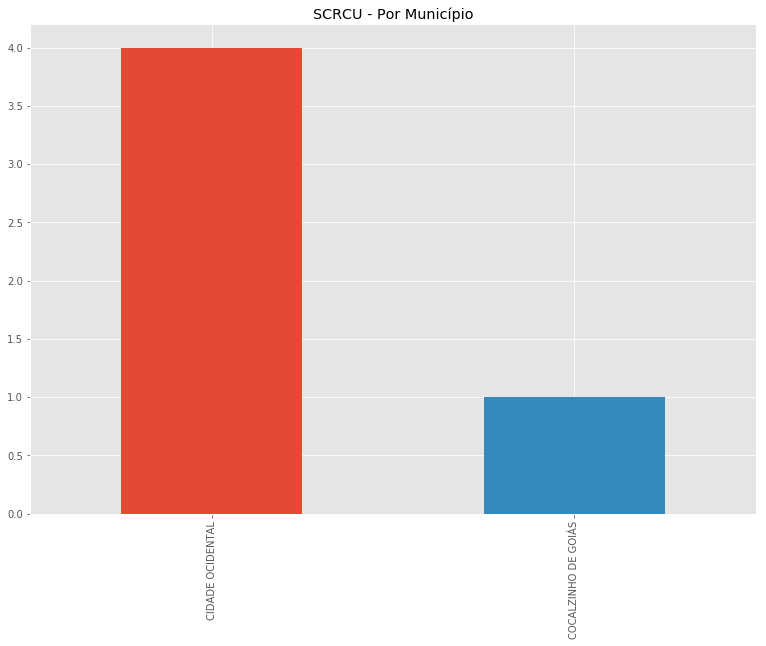

In [33]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


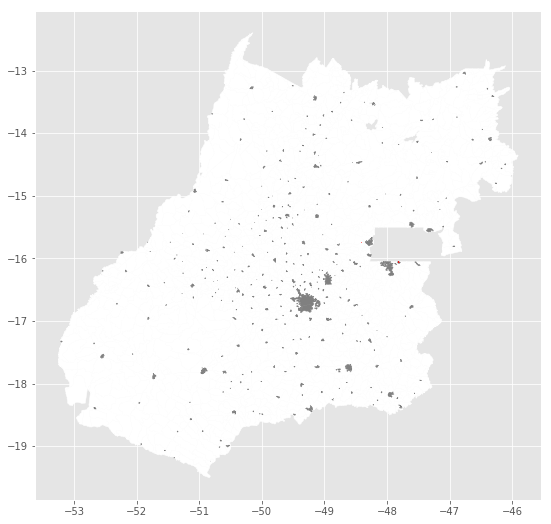

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [35]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [36]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [37]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [39]:
regioes_urbanas_df.head()

,geometry,FONTE
2519,POLYGON ((-47.81317898760477 -16.0502626516097...,1.0
2520,"POLYGON ((-47.8128830400073 -16.0528087848371,...",1.0
2547,POLYGON ((-47.81461386480203 -16.0539416398830...,1.0
2548,"POLYGON ((-47.8158023976524 -16.0547273347684,...",1.0
2590,"POLYGON ((-48.4092680120497 -15.7397607031149,...",1.0


In [40]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [41]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [42]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)